# Лабораторная работа 4

## Классификация

### Модель 1

In [1]:
# import numpy
from keras import models
from keras import metrics
from keras import layers, losses
# from numpy import loadtxt
from keras import optimizers
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

from keras import backend as K


Using TensorFlow backend.


In [2]:
def recall_m(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
    recall = true_positives / (possible_positives + K.epsilon())
    return recall


def precision_m(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
    precision = true_positives / (predicted_positives + K.epsilon())
    return precision

In [3]:
model = models.Sequential()
model.add(layers.Dense(8, activation='relu', input_shape=(5,)))
model.add(layers.Dense(8, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

In [4]:
data1 = pd.read_csv("mammographic_masses.data")

In [5]:
data1.replace('?', np.nan, inplace=True)

In [6]:
data = data1.dropna()

In [7]:
data.head()

,5,67,3,5.1,3.1,1
1,5,58,4,5,3,1
2,4,28,1,1,3,0
7,5,57,1,5,3,1
9,5,76,1,4,3,1
10,3,42,2,1,3,1


In [8]:
data.isnull().sum()

5      0
67     0
3      0
5.1    0
3.1    0
1      0
dtype: int64

In [9]:
#Разбиение данных на тренировочные и тестовые
from sklearn.model_selection import train_test_split

x, y = data.iloc[:, 0:5].values, data.iloc[:, 5].values
x_train, x_test, y_train, y_test = \
        train_test_split(x, y, test_size=0.3, random_state=0)
#x, y

In [10]:
#Стандартизация данных
from sklearn.preprocessing import StandardScaler

stdsc = StandardScaler()
X_train_std = stdsc.fit_transform(x_train)
X_test_std = stdsc.transform(x_test)

In [11]:
x_val = X_train_std[:250]
partial_x_train = X_train_std[250:]
y_val = y_train[:250]
partial_y_train = y_train[250:]


metrics = ['acc', precision_m, recall_m]

In [12]:
model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics = metrics)
history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=50,
                    batch_size=8,
                    validation_data=(x_val, y_val))

Train on 330 samples, validate on 250 samples
Epoch 1/50
330/330 [==============================] - 0s 669us/step - loss: 0.7802 - acc: 0.4758 - precision_m: 0.4996 - recall_m: 0.9180 - val_loss: 0.7319 - val_acc: 0.4240 - val_precision_m: 0.4157 - val_recall_m: 0.9609
Epoch 2/50
330/330 [==============================] - 0s 209us/step - loss: 0.7004 - acc: 0.5212 - precision_m: 0.5230 - recall_m: 0.9960 - val_loss: 0.6741 - val_acc: 0.4280 - val_precision_m: 0.4180 - val_recall_m: 0.9688
Epoch 3/50
330/330 [==============================] - 0s 200us/step - loss: 0.6435 - acc: 0.5242 - precision_m: 0.5247 - recall_m: 0.9960 - val_loss: 0.6346 - val_acc: 0.4960 - val_precision_m: 0.4490 - val_recall_m: 0.9531
Epoch 4/50
330/330 [==============================] - 0s 198us/step - loss: 0.6037 - acc: 0.6879 - precision_m: 0.6335 - recall_m: 0.9238 - val_loss: 0.6081 - val_acc: 0.7440 - val_precision_m: 0.6238 - val_recall_m: 0.8844
Epoch 5/50
330/330 [==============================] - 0s 1

330/330 [==============================] - 0s 187us/step - loss: 0.3815 - acc: 0.8455 - precision_m: 0.8557 - recall_m: 0.8603 - val_loss: 0.3780 - val_acc: 0.8400 - val_precision_m: 0.7567 - val_recall_m: 0.8349
Epoch 38/50
330/330 [==============================] - 0s 183us/step - loss: 0.3814 - acc: 0.8485 - precision_m: 0.8472 - recall_m: 0.8694 - val_loss: 0.3774 - val_acc: 0.8400 - val_precision_m: 0.7567 - val_recall_m: 0.8349
Epoch 39/50
330/330 [==============================] - 0s 189us/step - loss: 0.3798 - acc: 0.8485 - precision_m: 0.8484 - recall_m: 0.8619 - val_loss: 0.3774 - val_acc: 0.8400 - val_precision_m: 0.7567 - val_recall_m: 0.8349
Epoch 40/50
330/330 [==============================] - 0s 180us/step - loss: 0.3801 - acc: 0.8455 - precision_m: 0.8249 - recall_m: 0.8395 - val_loss: 0.3767 - val_acc: 0.8440 - val_precision_m: 0.7682 - val_recall_m: 0.8271
Epoch 41/50
330/330 [==============================] - 0s 193us/step - loss: 0.3788 - acc: 0.8485 - precision_m:

In [13]:
print('\ntrain results:\n')
loss, accuracy, precision, recall = model.evaluate(X_train_std, y_train, verbose=0)
print("loss={:.2f}, accuracy={:.2f}, precision={:.2f}, recall={:.2f}".format(loss, accuracy, precision, recall))

print('\ntest results:\n')
loss, accuracy, precision, recall = model.evaluate(X_test_std, y_test, verbose=0)
print("loss={:.2f}, accuracy={:.2f}, precision={:.2f}, recall={:.2f}".format(loss, accuracy, precision, recall))


train results:

loss=0.37, accuracy=0.84, precision=0.83, recall=0.87

test results:

loss=0.44, accuracy=0.80, precision=0.79, recall=0.83


In [14]:
history_dict = history.history
#history_dict.keys()

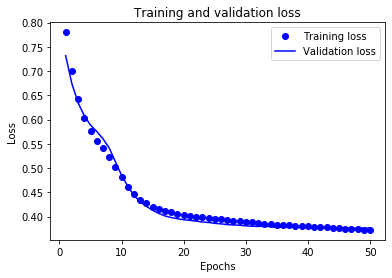

In [15]:
import matplotlib.pyplot as plt
history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
epochs = range(1, len(history_dict['acc']) + 1)
plt.plot(epochs, loss_values, 'bo', label='Training loss')
plt.plot(epochs, val_loss_values, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')

plt.ylabel('Loss')
plt.legend()
plt.show()

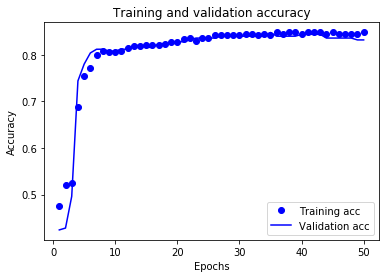

In [16]:
acc_values = history_dict['acc'] 
val_acc_values = history_dict['val_acc']
plt.plot(epochs, acc_values, 'bo', label='Training acc')
plt.plot(epochs, val_acc_values, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

### Модель 2

In [17]:
model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(5,)))
model.add(layers.Dense(4, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

In [18]:
model.compile(optimizer='rmsprop',
              loss='mse',
              metrics = metrics)
history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=30,
                    batch_size=8,
                    validation_data=(x_val, y_val))

Train on 330 samples, validate on 250 samples
Epoch 1/30
330/330 [==============================] - 0s 590us/step - loss: 0.2490 - acc: 0.5242 - precision_m: 0.5238 - recall_m: 1.0000 - val_loss: 0.2428 - val_acc: 0.4480 - val_precision_m: 0.4269 - val_recall_m: 0.9688
Epoch 2/30
330/330 [==============================] - 0s 201us/step - loss: 0.2198 - acc: 0.5394 - precision_m: 0.5315 - recall_m: 0.9960 - val_loss: 0.2187 - val_acc: 0.4880 - val_precision_m: 0.4412 - val_recall_m: 0.9427
Epoch 3/30
330/330 [==============================] - 0s 191us/step - loss: 0.2024 - acc: 0.6636 - precision_m: 0.6048 - recall_m: 0.9107 - val_loss: 0.2049 - val_acc: 0.7680 - val_precision_m: 0.6475 - val_recall_m: 0.9193
Epoch 4/30
330/330 [==============================] - 0s 187us/step - loss: 0.1919 - acc: 0.7545 - precision_m: 0.7064 - recall_m: 0.9008 - val_loss: 0.1967 - val_acc: 0.8040 - val_precision_m: 0.6833 - val_recall_m: 0.8802
Epoch 5/30
330/330 [==============================] - 0s 1

In [19]:
print('\ntrain results:\n')
loss, accuracy, precision, recall = model.evaluate(X_train_std, y_train, verbose=0)
print("loss={:.2f}, accuracy={:.2f}, precision={:.2f}, recall={:.2f}".format(loss, accuracy, precision, recall))

print('\ntest results:\n')
loss, accuracy, precision, recall = model.evaluate(X_test_std, y_test, verbose=0)
print("loss={:.2f}, accuracy={:.2f}, precision={:.2f}, recall={:.2f}".format(loss, accuracy, precision, recall))


train results:

loss=0.14, accuracy=0.84, precision=0.84, recall=0.84

test results:

loss=0.15, accuracy=0.80, precision=0.78, recall=0.85


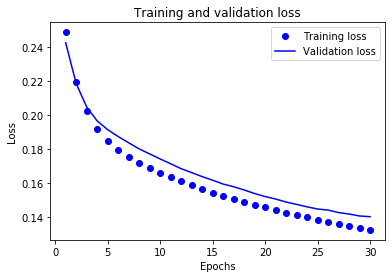

In [20]:
import matplotlib.pyplot as plt
history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
epochs = range(1, len(history_dict['acc']) + 1)
plt.plot(epochs, loss_values, 'bo', label='Training loss')
plt.plot(epochs, val_loss_values, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')

plt.ylabel('Loss')
plt.legend()
plt.show()

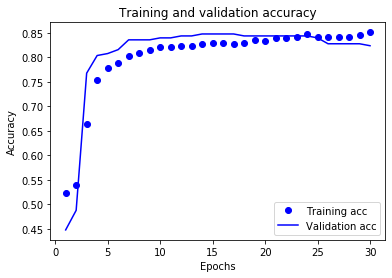

In [21]:
acc_values = history_dict['acc'] 
val_acc_values = history_dict['val_acc']
plt.plot(epochs, acc_values, 'bo', label='Training acc')
plt.plot(epochs, val_acc_values, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

## Регрессия

In [22]:
import numpy
from keras import models, Sequential
from keras import layers, losses
from keras.layers import Dense
from numpy import loadtxt
from keras import optimizers
import pandas as pd
# import numpy as np
from sklearn.preprocessing import StandardScaler


In [23]:
def build_model():
  model = models.Sequential([
    layers.Dense(64, activation='relu', input_shape=[len(data.keys())-1]),
    layers.Dense(64, activation='relu'),
    layers.Dense(1)
  ])
  model.compile(optimizer='rmsprop',
              loss='mse',
              metrics = ['mae','mse'])
  return model

In [24]:
data = pd.read_csv("winequality-red.csv")

In [25]:
data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [26]:
model = build_model()

In [27]:
from sklearn.model_selection import train_test_split

X = data.iloc[:, :-1].values
y = data['quality'].values
from sklearn.preprocessing import MinMaxScaler
MMS = MinMaxScaler()
X = MMS.fit_transform(X)
y = y.reshape(-1, 1)
y = MMS.fit_transform(y)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)


In [28]:
# Compile the network :
# model.compile(loss='mean_absolute_error', optimizer='adam', metrics=['mean_absolute_error'])
model.fit(X_train, y_train, epochs = 10)
y_train_pred = model.predict(X_train)
y_test_pred= model.predict(X_test)

Epoch 1/10
1119/1119 [==============================] - 0s 110us/step - loss: 0.0336 - mae: 0.1431 - mse: 0.0336
Epoch 2/10
1119/1119 [==============================] - 0s 33us/step - loss: 0.0204 - mae: 0.1112 - mse: 0.0204
Epoch 3/10
1119/1119 [==============================] - 0s 33us/step - loss: 0.0195 - mae: 0.1092 - mse: 0.0195
Epoch 4/10
1119/1119 [==============================] - 0s 31us/step - loss: 0.0185 - mae: 0.1053 - mse: 0.0185
Epoch 5/10
1119/1119 [==============================] - 0s 30us/step - loss: 0.0180 - mae: 0.1039 - mse: 0.0180
Epoch 6/10
1119/1119 [==============================] - 0s 32us/step - loss: 0.0181 - mae: 0.1047 - mse: 0.0181
Epoch 7/10
1119/1119 [==============================] - 0s 30us/step - loss: 0.0177 - mae: 0.1028 - mse: 0.0177
Epoch 8/10
1119/1119 [==============================] - 0s 29us/step - loss: 0.0172 - mae: 0.1024 - mse: 0.0172
Epoch 9/10
1119/1119 [==============================] - 0s 28us/step - loss: 0.0172 - mae: 0.1027 - mse

In [29]:
from sklearn.metrics import mean_squared_error
print('MSE тренировка: %.3f, тестирование: %.3f' % (
mean_squared_error(y_train, y_train_pred),
mean_squared_error(y_test, y_test_pred)))

MSE тренировка: 0.016, тестирование: 0.016


In [30]:
from sklearn.metrics import r2_score
print('R2 тренировка: %.3f, тестирование: %.3f' %(
                        r2_score(y_train, y_train_pred),
                        r2_score(y_test, y_test_pred)))


R2 тренировка: 0.427, тестирование: 0.308


In [31]:
NN_model = Sequential()

In [32]:
# The Input Layer :
NN_model.add(Dense(128, kernel_initializer='normal', input_shape=[len(data.keys())-1], activation='relu'))

In [33]:
# The Hidden Layers :
NN_model.add(Dense(256, kernel_initializer='normal', activation='relu'))
NN_model.add(Dense(256, kernel_initializer='normal', activation='relu'))
NN_model.add(Dense(256, kernel_initializer='normal', activation='relu'))

In [34]:
# The Output Layer :
NN_model.add(Dense(1, kernel_initializer='normal', activation='linear'))

In [35]:
# Compile the network :
NN_model.compile(loss='mean_absolute_error', optimizer='adam', metrics=['mean_absolute_error'])
NN_model.fit(X_train, y_train, epochs = 10)
y_train_pred = NN_model.predict(X_train)
y_test_pred= NN_model.predict(X_test)

Epoch 1/10
1119/1119 [==============================] - 0s 209us/step - loss: 0.2071 - mean_absolute_error: 0.2071
Epoch 2/10
1119/1119 [==============================] - 0s 68us/step - loss: 0.1119 - mean_absolute_error: 0.1119
Epoch 3/10
1119/1119 [==============================] - 0s 68us/step - loss: 0.1099 - mean_absolute_error: 0.1099
Epoch 4/10
1119/1119 [==============================] - 0s 64us/step - loss: 0.1028 - mean_absolute_error: 0.1028
Epoch 5/10
1119/1119 [==============================] - 0s 64us/step - loss: 0.1003 - mean_absolute_error: 0.1003
Epoch 6/10
1119/1119 [==============================] - 0s 62us/step - loss: 0.1000 - mean_absolute_error: 0.1000
Epoch 7/10
1119/1119 [==============================] - 0s 63us/step - loss: 0.0974 - mean_absolute_error: 0.0974
Epoch 8/10
1119/1119 [==============================] - 0s 62us/step - loss: 0.1002 - mean_absolute_error: 0.1002
Epoch 9/10
1119/1119 [==============================] - 0s 62us/step - loss: 0.0990 - m

In [36]:
print('MSE тренировка: %.3f, тестирование: %.3f' % (
mean_squared_error(y_train, y_train_pred),
mean_squared_error(y_test, y_test_pred)))

MSE тренировка: 0.016, тестирование: 0.016


In [37]:
print('R2 тренировка: %.3f, тестирование: %.3f' %(
                        r2_score(y_train, y_train_pred),
                        r2_score(y_test, y_test_pred)))

R2 тренировка: 0.392, тестирование: 0.342
